In [1]:
import antigravity

In [2]:
#import antigravity

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mycolorpy import colorlist as mcp
import pandas as pd
import csv
from scipy.stats import binned_statistic
import scipy.optimize as opt
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
plt.rcParams['font.size'] = 15 
%run Fraunhofer
%run ErrMask

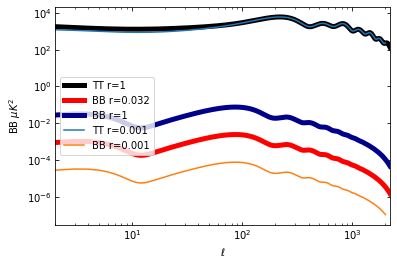

In [2]:
(ll, T, E, B) = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/camb_96896687_totcls.dat.txt', unpack=True, usecols=(0,1,2,3))
B_014 = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/camb_34747700_totcls.dat.txt', unpack=True, usecols=(3))
B_032 = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/camb_41507785_totcls.dat.txt', unpack=True, usecols=(3))
(ll_r, T_r, B_r) = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/camb_52566576_totcls.dat.txt', unpack=True, usecols=(0,1,3))
plt.loglog(ll, T, lw=5, label='TT r=1', color='black')
plt.loglog(ll, B_032, lw=5, label='BB r=0.032', color='red')
plt.loglog(ll, B, lw=5, label='BB r=1', color='darkblue') # 0th: ell; 1st: TT; 2nd: EE; 3rd: BB
plt.loglog(ll_r, T_r, label='TT r=0.001')
plt.loglog(ll_r, B_r, label='BB r=0.001')
plt.xlabel(r'$\ell$')
plt.ylabel(r'BB $\mu K^2$')
plt.xlim(2,2200)
plt.legend();


In [ ]:
with plt.xkcd():
    cl = mcp.gen_color(cmap="viridis",n=3)
    fig = plt.figure(figsize=(8,6))
    plt.loglog(ll, T, lw=4, color=cl[0], label='TT r=1')
    plt.loglog(ll, B, lw=4, color=cl[1], label='BB r=1') # 0th: ell; 1st: TT; 2nd: EE; 3rd: BB
    plt.loglog(ll_r, B_r, lw=4, color=cl[2], label='BB r=0.001')
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$\ell(\ell+1)C_{\ell}/2\pi$ $[\mu K^2]$')
    plt.xlim(2,2000)
    plt.title('CMB Power Spectrum')
    plt.legend(loc='upper left');

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

# Last modified on 03/16

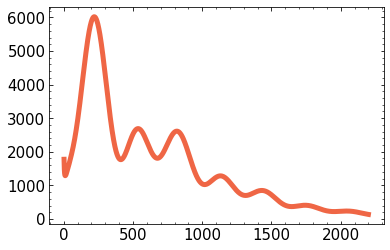

In [47]:
#cl = mcp.gen_color(cmap="inferno",n=3)
cl = ['#ef6645', '#f88c51', '#fdb365']
plt.plot(ll, T, lw=5, color=cl[0])

amp = 0.2
[ 51.01131973 102.02263946]
Error amplitude is 0.2, the corresponding leakage^2 is 0.00000
r= 0.00012999461219685452
RMS =  0.017261955708125876
average error is  2.371519435420171e-07
amp = 0.45
[ 51.01131973 102.02263946]
Error amplitude is 0.45, the corresponding leakage^2 is 0.00000
r= 0.0033717334545512456
RMS =  0.03892099654345143
average error is  1.205458792627347e-06
amp = 2.7
[ 51.01131973 102.02263946]
Error amplitude is 2.7, the corresponding leakage^2 is 0.00013
r= 4.379528444037155
RMS =  0.23318430293024303
average error is  4.327186382958996e-05


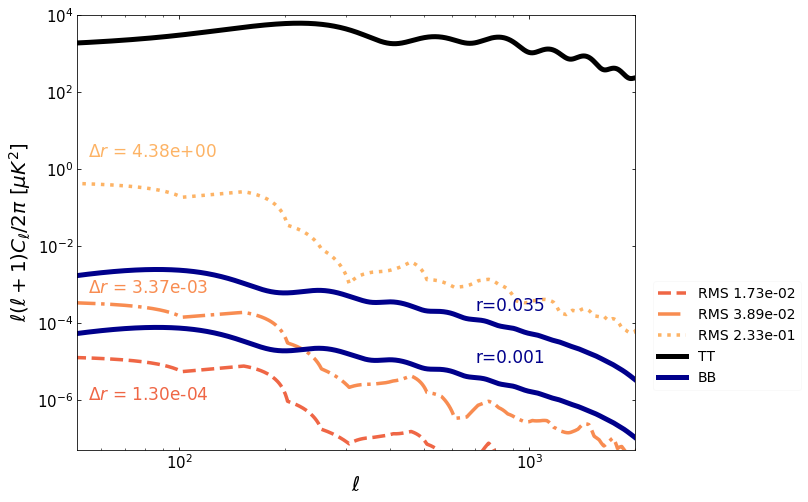

In [42]:
### calculate the leakage power spectrum as a function of ell 
N_screen = 4096
N_theta = 1024
D = 10.0
sigma = 1.0
maxdeg = 5.0
trunc = 'y'
option = 'amp'
leak = []
#amp = np.array([0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.5, 2.0, 5.0])
amp = np.array([0.2, 0.45, 2.7])
#amp = np.array([0.1,1.0])
r = np.array([])
kin = 15
kout = 25
noise_norm = np.zeros_like(amp)
txt_leak = np.array([]) # 1D array containing all leakage spectrum, will be printed to a text file.
#cl = mcp.gen_color(cmap="magma",n=len(amp))
cl = ['#ef6645', '#f88c51', '#fdb365']
ls = ['--', '-.', ':']


# perfect gaussian create E screen [m]
screen = {}
screen['N'] = N_screen
screen['D'] = D
Initialize(screen)
center = (screen['D']/2, screen['D']/2)
MultByGaussian(screen, center, sigma)
if trunc=='y':
    InCircle(screen, center, 2.0)
ScreenFFT(screen)

# interpolation in sky intensity [rad] (unperturbed beam)
lam = 0.002 #mm wavelength
thetamaxdeg = maxdeg
thetamax = thetamaxdeg*np.pi/180. # in radians
theta_vec = np.linspace(-thetamax,thetamax,N_theta) 
II0 = Project_I_on_thetagrid(theta_vec,screen,lam)   # unperturbed
fft_I0 = np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(II0)))) # in ell space
theta_vec = np.linspace(0,2*thetamax,N_theta) #rad

#calculate ell
n = theta_vec.shape[0]
dl = 2*np.pi/theta_vec.max() # dl in 1/rad space
l_vec = np.fft.fftshift(dl * np.fft.fftfreq(n)*n)
(l_x, l_y) = np.meshgrid(l_vec,l_vec) # 1/rad 
l = np.sqrt(l_x**2 + l_y**2)

fig = plt.figure(figsize=(10,8))

# #cl_ = mcp.gen_color(cmap="viridis",n=3)
# plt.subplot(1,2,1)
# plt.loglog(ll, T, lw=4, color='black', label='TT')
# plt.loglog(ll, B, lw=4, color='darkblue', label='BB r=1') # 0th: ell; 1st: TT; 2nd: EE; 3rd: BB
# plt.loglog(ll_r, B_r, lw=4, color='blue', label='BB r=0.001')
# plt.xlabel(r'$\ell$')
# plt.ylabel(r'$\ell(\ell+1)C_{\ell}/2\pi$ $[\mu K^2]$')
# plt.xlim(2,2000)
# plt.title('CMB Power Spectrum')
# plt.legend(loc='upper left')

# plt.subplot(1,2,2)
# plt.plot([], [], ' ', label="                       ")

for i in range(len(amp)):
    print('amp =', amp[i])
    
    # perturbed E screen
    screen1 = {}
    screen1['N'] = N_screen
    screen1['D'] = D
    Initialize(screen1)
    MultByGaussian(screen1, center, sigma)
    if trunc=='y':
        InCircle(screen1, center, 2.0)
    
    if option=='phase':
        emap_E = filter_annulus_phase(screen1, amp[i], kin, kout)
    elif option=='amp':
        emap_E = filter_annulus_amp(screen1, amp[i], kin, kout)
    else: print('Choose phase or amplitude errors')
    
    ScreenFFT(screen1)
    
    # interpolate the perturbed beam 
    theta_vec = np.linspace(-thetamax,thetamax,N_theta) 
    II1 = Project_I_on_thetagrid(theta_vec, screen1, lam) # perturbed
    # shift the beam from being centered at theta=0 to theta=thetamax so that the beam spans from 0 deg to 2*thetamax deg
    theta_vec = np.linspace(0,2*thetamax,N_theta) #rad
    
    # FT of sky intensity
    I_diff = II1 - II0 # take the difference in theta space (sky)
    fft_Idiff = np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(I_diff)))) # FFT the difference to ell space
    fft_I1 = np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(II1)))) # in ell space
    
    # average (FT of II0)^2 radially 
    bin_edges = np.linspace(0,l.max(),int(len(theta_vec)/2))
    l_flatten = l.flatten()
    fft_numerical0 = fft_I0.flatten()
    fft_numerical1 = fft_I1.flatten()
    fft_numerical_diff = fft_Idiff.flatten()
    bin_mean0, bin_edge, bin_num = binned_statistic(l_flatten, fft_numerical0, statistic='mean', bins=bin_edges) 
    bin_mean1, bin_edge, bin_num = binned_statistic(l_flatten, fft_numerical1, statistic='mean', bins=bin_edges) # bin_mean is the binned numerical beam
    bin_mean_diff, bin_edge, bin_num = binned_statistic(l_flatten, fft_numerical_diff, statistic='mean', bins=bin_edges) # bin the beam difference
    l_vec = bin_edges[0:-1] # ell 1D vector
    
    beam_diff_rela = bin_mean_diff/bin_mean0 # relative beam difference
    print(l_vec[1:3]) # making sure we average the leakage at ell=85 and ell=170
    leak = np.append(leak, np.mean(beam_diff_rela[1:3])) # average the beam difference at l=85 and l=170 (2nd and 3rd elements)
    txt_leak = np.append(txt_leak, beam_diff_rela**2) # leakage power spectrum stored in the 1D array leak_spec
    print('Error amplitude is {}, the corresponding leakage^2 is {:.5f}'.format(amp[i], leak[i]**2))
    
    
    ### plot the leakage spectrum and T->B power spectrum
    spline = interp.InterpolatedUnivariateSpline(l_vec, beam_diff_rela**2, k=1)
    leakage = spline(ll)
    #plt.loglog(ll,T*leakage, label='leakage {}'.format(amp[i])) 
    
    """calculate corresponding r"""
    #####!!! updated
    want = np.where((ll<150)&(ll>50))
    B0 = np.mean(B[want]) # BB power at ell=100 with r=1
    B_leak = np.mean(T[want]*spline(ll[want]))
    r = np.append(r, 1 * (B_leak / B0)) # r of the leakage at ell=100
    print('r=',r[i])
    
    """calculate normalized noise level"""
    #####!!! updated  
    emap_fft = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(emap_E))) # scaled error map in fourier space
    norm_fft = np.abs(emap_fft**2)/screen1['dk']**2/screen1['N']**4 # V^2/Hz^2
    idx = np.where((screen1['kap']<kout) & (screen1['kap']>kin)) # inside the filter
    avg_fft = np.mean(norm_fft[idx]) # V^2/Hz^2
    total_Vf = np.sum(norm_fft)*screen1['dk']**2
    rms_sq = np.abs(rms(emap_E)**2)
    #print('V^2/Hz^2 = ',total_Vf)
    print('RMS = ', np.sqrt(rms_sq))
    noise_norm[i] = avg_fft
    print('average error is ', avg_fft)
    #print('sum of avg error is', avg_fft * np.pi*(kout**2-kin**2))
    
    """plot the leakage poewr spectrum with normalized noise labeled"""
    #plt.loglog(ll,T*leakage, label='Noise {:.2e}'.format(avg_fft), ls=ls[i], lw=3.5, color=cl[i]) 
    plt.loglog(ll, T*leakage, label='RMS {:.2e}'.format(np.sqrt(rms_sq)), ls=ls[i], lw=3.5, color=cl[i])

# plt.plot([], [], ' ', label="                       ")
# plt.plot([], [], ' ', label="                       ")
plt.loglog(ll, T, lw=5, label='TT', color='black')
plt.loglog(ll, B_032, lw=5, label='BB', color='darkblue') #r=0.032 current BICEP measurement
plt.loglog(ll_r, B_r, lw=5, color='darkblue') # r = 0.001, future CMB-S4
plt.xlabel(r'$\ell$', fontsize=20)
plt.ylabel(r'$\ell(\ell+1)C_{\ell}/2\pi$ $[\mu K^2]$', fontsize=20)
plt.legend(bbox_to_anchor=(1.02, 0.12),loc="lower left", fontsize = 14, framealpha=0.1)
plt.xlim(l_vec[1],2000)
# plt.text(2.8e3, 1e-1, 'T to P leakage spectrum:', fontsize=13.5)
# plt.text(2.8e3, 1.5e-5, 'CMB power spectrum:', fontsize=13.5)
plt.text(0.55e2, 2, r'$\Delta r$ = {:.2e}'.format(r[2]), color=cl[2], fontsize=17)
plt.text(0.55e2, 0.6e-3, r'$\Delta r$ = {:.2e}'.format(r[1]), color=cl[1], fontsize=17)
plt.text(0.55e2, 0.1e-5, r'$\Delta r$ = {:.2e}'.format(r[0]), color=cl[0], fontsize=17)

#plt.text(13.5, 0.3e-2, 'r=0.032', color='darkblue')
plt.text(0.7e3, 0.2e-3, 'r=0.035', color='darkblue', fontsize=17)
plt.text(0.7e3, 0.9e-5, 'r=0.001', color='darkblue', fontsize=17)
plt.ylim(0.5e-7, 1e4)

plt.savefig('/Users/zhaoyuhuai/Desktop/SeniorProj/Thesis/Leakage_ps_h.png', bbox_inches='tight', dpi=600)
plt.show()


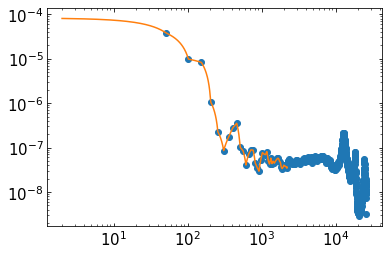

In [31]:
spline = interp.InterpolatedUnivariateSpline(l_vec, beam_diff_rela**2, k=1)
leakage = spline(ll)
plt.loglog(l_vec, beam_diff_rela**2, 'o')
plt.loglog(ll, spline(ll))

In [12]:
interp.InterpolatedUnivariateSpline?

Init signature:
interp.InterpolatedUnivariateSpline(
    x,
    y,
    w=None,
    bbox=[None, None],
    k=3,
    ext=0,
    check_finite=False,
)
Docstring:     
1-D interpolating spline for a given set of data points.

Fits a spline y = spl(x) of degree `k` to the provided `x`, `y` data.
Spline function passes through all provided points. Equivalent to
`UnivariateSpline` with  s=0.

Parameters
----------
x : (N,) array_like
    Input dimension of data points -- must be strictly increasing
y : (N,) array_like
    input dimension of data points
w : (N,) array_like, optional
    Weights for spline fitting.  Must be positive.  If None (default),
    weights are all equal.
bbox : (2,) array_like, optional
    2-sequence specifying the boundary of the approximation interval. If
    None (default), ``bbox=[x[0], x[-1]]``.
k : int, optional
    Degree of the smoothing spline.  Must be 1 <= `k` <= 5.
ext : int or str, optional
    Controls the extrapolation mode for elements
    not in the i

In [36]:
print('{:.3e}'.format(r[0]))

3.450e-05


In [61]:
### write to a csv file
txt_amp = np.repeat(amp, len(beam_diff_rela)) # 0th column - noise amplitude
txt_noise = np.repeat(noise_norm, len(beam_diff_rela)) # 1st column - normalized noise level in k space
txt_ell = np.tile(l_vec, len(amp)) # 2nd column - ell vector
txt_r = np.repeat(r, len(beam_diff_rela)) # 3rd column - tensor to scalar ratio r
# 4th column - txt_leakage stored in the loop, already a 1D array
with open('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/test_data_r.csv', 'w') as file:
    writer = csv.writer(file, delimiter='\t')
    writer.writerows(zip(txt_amp, txt_noise, txt_ell, txt_r, txt_leak))

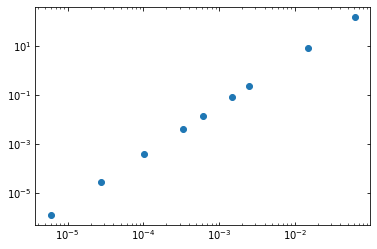

In [23]:
plt.loglog(leak, r,'o')

# 

amp = 1.0
[ 85.18556987 170.37113975]
Error amplitude is 1.0, the corresponding leakage^2 is 0.00000
r= [0.01445525] leaked T l100 =  [0.00103818]


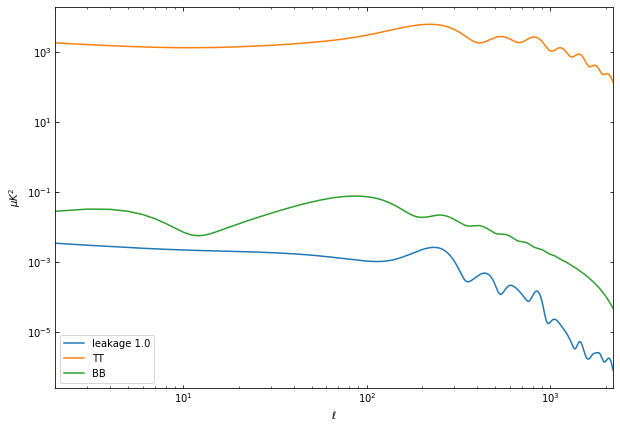

In [16]:
### TEST 03/16
"""
calculate the leakage power spectrum as a function of ell
""" 

# power spectrum of r=1
(ll, T, E, B) = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/camb_96896687_totcls.dat.txt', unpack=True, usecols=(0,1,2,3))

N_screen = 2048
N_theta = 512
D = 10.0
sigma = 1.0
maxdeg = 3.0
trunc = 'y'
option = 'amp'
#leak = []
amp = 1.0

# perfect gaussian create E screen [m]
screen = {}
screen['N'] = N_screen
screen['D'] = D
Initialize(screen)
center = (screen['D']/2, screen['D']/2)
MultByGaussian(screen, center, sigma)
if trunc=='y':
    InCircle(screen, center, 2.0)
ScreenFFT(screen)

# interpolation in sky intensity [rad] (unperturbed beam)
lam = 0.002 #mm wavelength
thetamaxdeg = maxdeg
thetamax = thetamaxdeg*np.pi/180. # in radians
theta_vec = np.linspace(-thetamax,thetamax,N_theta) 
II0 = Project_I_on_thetagrid(theta_vec,screen,lam)   # unperturbed
fft_I0 = np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(II0)))) # in ell space
theta_vec = np.linspace(0,2*thetamax,N_theta) #rad

#calculate ell
n = theta_vec.shape[0]
dl = 2*np.pi/theta_vec.max() # dl in 1/rad space
l_vec = np.fft.fftshift(dl * np.fft.fftfreq(n)*n)
(l_x, l_y) = np.meshgrid(l_vec,l_vec) # 1/rad 
l = np.sqrt(l_x**2 + l_y**2)

fig = plt.figure(figsize=(10,7))

#for i in range(len(amp)):
print('amp =', amp)

# perturbed E screen
screen1 = {}
screen1['N'] = N_screen
screen1['D'] = D
Initialize(screen1)
MultByGaussian(screen1, center, sigma)
if trunc=='y':
    InCircle(screen1, center, 2.0)

if option=='phase':
    filter_annulus_phase(screen1, amp, 10, 12)
elif option=='amp':
    filter_annulus_amp(screen1, amp, 10, 12)
else: print('Choose phase or amplitude errors')

ScreenFFT(screen1)

# interpolate the perturbed beam 
theta_vec = np.linspace(-thetamax,thetamax,N_theta) 
II1 = Project_I_on_thetagrid(theta_vec, screen1, lam) # perturbed
# shift the beam from being centered at theta=0 to theta=thetamax so that the beam spans from 0 deg to 2*thetamax deg
theta_vec = np.linspace(0,2*thetamax,N_theta) #rad

# FT of sky intensity
I_diff = II1 - II0 # take the difference in theta space (sky)
fft_Idiff = np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(I_diff)))) # FFT the difference to ell space
fft_I1 = np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(II1)))) # in ell space

# average (FT of II0)^2 radially 
bin_edges = np.linspace(0,l.max(),int(len(theta_vec)/2))
l_flatten = l.flatten()
fft_numerical0 = fft_I0.flatten()
fft_numerical1 = fft_I1.flatten()
fft_numerical_diff = fft_Idiff.flatten()
bin_mean0, bin_edge, bin_num = binned_statistic(l_flatten, fft_numerical0, statistic='mean', bins=bin_edges) 
bin_mean1, bin_edge, bin_num = binned_statistic(l_flatten, fft_numerical1, statistic='mean', bins=bin_edges) # bin_mean is the binned numerical beam
bin_mean_diff, bin_edge, bin_num = binned_statistic(l_flatten, fft_numerical_diff, statistic='mean', bins=bin_edges) # bin the beam difference
l_vec = bin_edges[0:-1] # ell 1D vector

beam_diff_rela = bin_mean_diff/bin_mean0 # relative beam difference
print(l_vec[1:3]) # making sure we average the leakage at ell=85 and ell=170
leak = np.mean(beam_diff_rela[1:3]) # average the beam difference at l=85 and l=170 (2nd and 3rd elements)
print('Error amplitude is {}, the corresponding leakage^2 is {:.5f}'.format(amp, leak**2))


### plot the leakage spectrum and T->B power spectrum
spline = interp.InterpolatedUnivariateSpline(l_vec, beam_diff_rela**2)
leakage = spline(ll)
B0 = B[np.where(ll==100)] # BB power at ell=100 with r=1
r = 1 * (T[np.where(ll==100)]*spline(100) / B0) # r of the leakage at ell=100
print('r=',r, 'leaked T l100 = ', T[np.where(ll==100)]*spline(100))
plt.loglog(ll,T*leakage, label='leakage {}'.format(amp)) 
    
plt.loglog(ll, T, label='TT')
plt.loglog(ll, B, label='BB')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\mu K^2$')
plt.legend()
plt.xlim(2,2200)
plt.legend()
plt.show()

In [5]:
np.arange(0.1, 10.2, 0.4).shape

(26,)

amp = 1.0
Error amplitude is 1.0, the corresponding leakage^2 is 0.00000 square of  0.0013446706819975356
r= [0.05641688]
average error is  4.506383738676185e-05


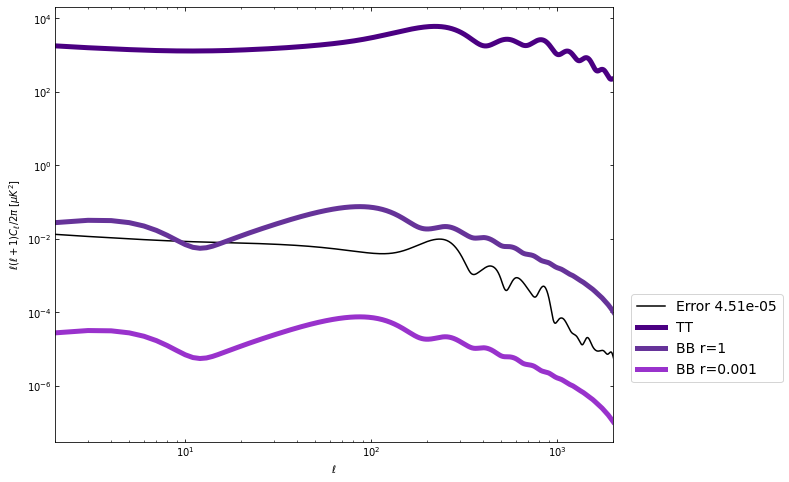

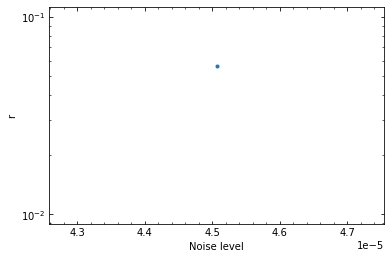

In [3]:
### 
### calculate the leakage power spectrum as a function of ell 
N_screen = 1500
N_theta = 512
D = 10.0
sigma = 1.0
maxdeg = 3.0
trunc = 'y'
option = 'amp'
amp=1.0
kin = 10
kout = 12
#initialize
leak = 0
r = 0
noise_norm = 0
txt_leak = 0 # 1D array containing all leakage spectrum, will be printed to a text file.

# perfect gaussian create E screen [m]
screen = {}
screen['N'] = N_screen
screen['D'] = D
Initialize(screen)
center = (screen['D']/2, screen['D']/2)
MultByGaussian(screen, center, sigma)
if trunc=='y':
    InCircle(screen, center, 2.0)
ScreenFFT(screen)

# interpolation in sky intensity [rad] (unperturbed beam)
lam = 0.002 #mm wavelength
thetamaxdeg = maxdeg
thetamax = thetamaxdeg*np.pi/180. # in radians
theta_vec = np.linspace(-thetamax,thetamax,N_theta) 
II0 = Project_I_on_thetagrid(theta_vec,screen,lam)   # unperturbed
fft_I0 = np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(II0)))) # in ell space
theta_vec = np.linspace(0,2*thetamax,N_theta) #rad

#calculate ell
n = theta_vec.shape[0]
dl = 2*np.pi/theta_vec.max() # dl in 1/rad space
l_vec = np.fft.fftshift(dl * np.fft.fftfreq(n)*n)
(l_x, l_y) = np.meshgrid(l_vec,l_vec) # 1/rad 
l = np.sqrt(l_x**2 + l_y**2)

fig = plt.figure(figsize=(10,8))


print('amp =', amp)

# perturbed E screen
screen1 = {}
screen1['N'] = N_screen
screen1['D'] = D
Initialize(screen1)
MultByGaussian(screen1, center, sigma)
if trunc=='y':
    InCircle(screen1, center, 2.0)

if option=='phase':
    emap_E = filter_annulus_phase(screen1, amp, kin, kout)
elif option=='amp':
    emap_E = filter_annulus_amp(screen1, amp, kin, kout)
else: print('Choose phase or amplitude errors')

ScreenFFT(screen1)

# interpolate the perturbed beam 
theta_vec = np.linspace(-thetamax,thetamax,N_theta) 
II1 = Project_I_on_thetagrid(theta_vec, screen1, lam) # perturbed
# shift the beam from being centered at theta=0 to theta=thetamax so that the beam spans from 0 deg to 2*thetamax deg
theta_vec = np.linspace(0,2*thetamax,N_theta) #rad

# FT of sky intensity
I_diff = II1 - II0 # take the difference in theta space (sky)
fft_Idiff = np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(I_diff)))) # FFT the difference to ell space
fft_I1 = np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(II1)))) # in ell space

# average (FT of II0)^2 radially 
bin_edges = np.linspace(0,l.max(),int(len(theta_vec)/2))
l_flatten = l.flatten()
fft_numerical0 = fft_I0.flatten()
fft_numerical1 = fft_I1.flatten()
fft_numerical_diff = fft_Idiff.flatten()
bin_mean0, bin_edge, bin_num = binned_statistic(l_flatten, fft_numerical0, statistic='mean', bins=bin_edges) 
bin_mean1, bin_edge, bin_num = binned_statistic(l_flatten, fft_numerical1, statistic='mean', bins=bin_edges) # bin_mean is the binned numerical beam
bin_mean_diff, bin_edge, bin_num = binned_statistic(l_flatten, fft_numerical_diff, statistic='mean', bins=bin_edges) # bin the beam difference
l_vec = bin_edges[0:-1] # ell 1D vector

beam_diff_rela = bin_mean_diff/bin_mean0 # relative beam difference
#leak = np.mean(beam_diff_rela[1:3]) # average the beam difference at l=85 and l=170 (2nd and 3rd elements)
leak = np.mean(beam_diff_rela[l_vec<500]) # average the beam difference between 0<l<500
txt_leak = beam_diff_rela**2 # leakage power spectrum stored in the 1D array leak_spec
print('Error amplitude is {}, the corresponding leakage^2 is {:.5f}'.format(amp, leak**2), 'square of ', leak)


### plot the leakage spectrum and T->B power spectrum
spline = interp.InterpolatedUnivariateSpline(l_vec, beam_diff_rela**2)
leakage = spline(ll)
#plt.loglog(ll,T*leakage, label='leakage {}'.format(amp[i])) 

"""calculate corresponding r"""
#####!!! updated
B0 = B[np.where(ll==100)] # BB power at ell=100 with r=1
r = 1 * (T[np.where(ll==100)]*spline(100) / B0) # r of the leakage at ell=100
print('r=',r)

"""calculate normalized noise level"""
#####!!! updated  
emap_fft = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(emap_E))) # scaled error map in fourier space
norm_fft = np.abs(emap_fft**2)/screen1['dk']**2/screen1['N']**4 # V^2/Hz^2
idx = np.where((screen1['kap']<kout) & (screen1['kap']>kin)) # inside the filter
avg_fft = np.mean(norm_fft[idx]) # V^2/Hz^2
total_Vf = np.sum(norm_fft)*screen1['dk']**2
rms_sq = np.abs(rms(emap_E)**2)
#print('V^2/Hz^2 = ',total_Vf)
#print('RMS^2 = ', rms_sq)
noise_norm = avg_fft
print('average error is ', avg_fft)
#print('sum of avg error is', avg_fft * np.pi*(kout**2-kin**2))

"""plot the leakage poewr spectrum with normalized noise labeled"""
plt.loglog(ll,T*leakage, label='Error {:.2e}'.format(avg_fft), color='black') 
    
plt.loglog(ll, T, lw=5, label='TT', color='indigo')
plt.loglog(ll, B, lw=5, label='BB r=1', color='rebeccapurple')
plt.loglog(ll_r, B_r, lw=5, label='BB r=0.001', color='darkorchid')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_{\ell}/2\pi$ $[\mu K^2]$')
plt.legend(bbox_to_anchor=(1.02, 0.12),loc="lower left", fontsize = 14)
plt.xlim(2,2000)
plt.show()

plt.semilogy(noise_norm, r, 'o--', ms=3)
plt.xlabel('Noise level')
plt.ylabel('r')
plt.show()